# . Introduction

# Prédiction de la survie sur le Titanic 🎯
Ce projet de machine learning utilise le dataset Titanic pour prédire si un passager a survécu en fonction de ses caractéristiques.

Modèle utilisé : **RandomForestClassifier**, avec validation croisée et optimisation des hyperparamètres.

# Chargement des librairies

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Chargement des données

In [21]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Nettoyage et transformation

In [22]:
# Imputation conditionnelle de l'âge
df["Age"] = df.groupby(["Sex", "Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))

# Imputation de Embarked
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Suppression des colonnes inutiles
df.drop(["Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)

# Encodage
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
df = df.astype(int)  # pour convertir True/False en 1/0

# Création de la variable FamilySize
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df.drop(["SibSp", "Parch"], axis=1, inplace=True)

# Sélection des variables

In [23]:
features = ["Pclass", "Age", "Fare", "Sex_male", "FamilySize", "Embarked_S"]
X = df[features]
y = df["Survived"]

# Séparation train/test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Optimisation des hyperparamètres

In [25]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid.fit(X, y)
best_model = grid.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


# Évaluation finale

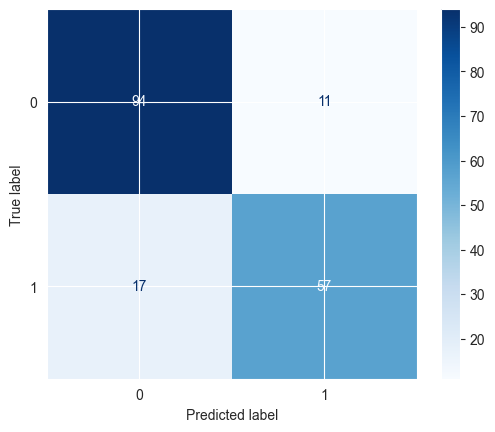

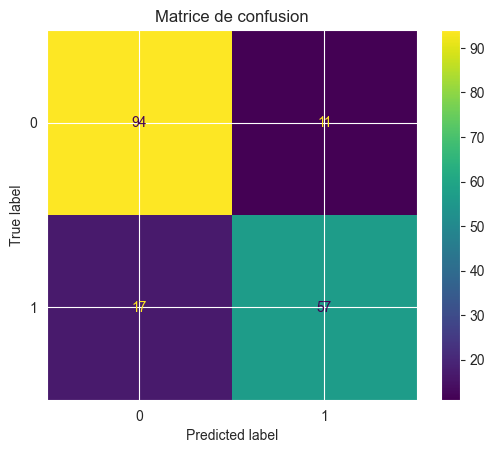

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



In [26]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap="Blues").plot()
plt.title("Matrice de confusion")
plt.show()

print(classification_report(y_test, y_pred))

# Importance des variables

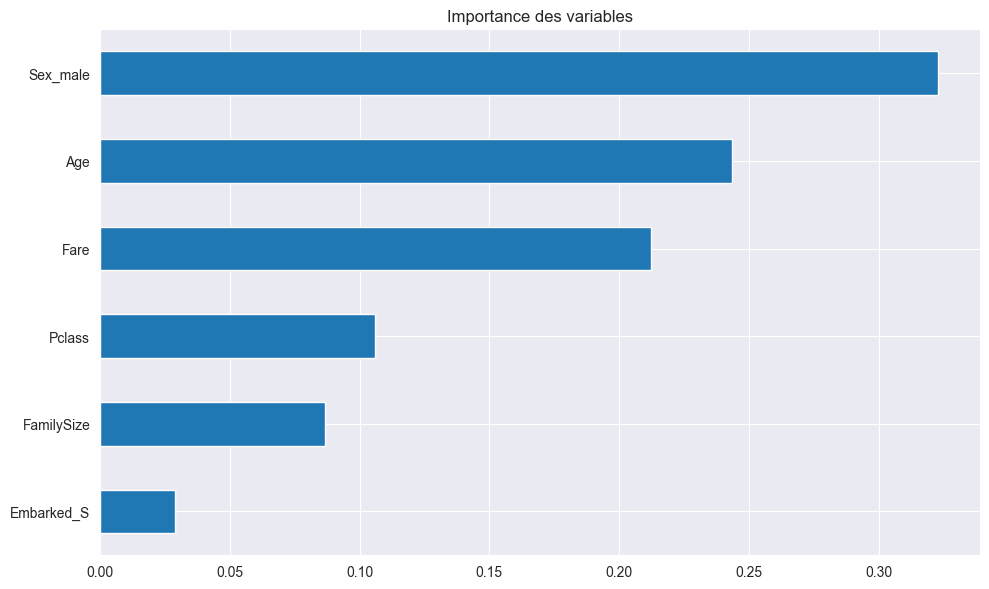

In [27]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(10,6))
plt.title("Importance des variables")
plt.tight_layout()
plt.show()

In [28]:
import joblib
joblib.dump(best_model, "titanic_model.pkl")

# Sauvegarder la liste exacte des colonnes utilisées
joblib.dump(X_train.columns.tolist(), "model_columns.pkl")

['model_columns.pkl']